In [1]:
import onnxruntime as rt
import uproot
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt


2025-02-12 11:54:54.760841: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
columns = [
    "era",
    "higgs1_reco_pt",
    "higgs1_reco_eta",
    "higgs1_reco_phi",
    "higgs1_reco_mass",
    "higgs2_reco_pt",
    "higgs2_reco_eta",
    "higgs2_reco_phi",
    "higgs2_reco_mass",
    "HT",
    "higgs1_DeltaRjj",
    "higgs2_DeltaRjj",
    "minDeltaR_Higgjj",
    "maxDeltaR_Higgjj",
    "higgs1_helicityCosTheta",
    "higgs2_helicityCosTheta",
    "hh_CosThetaStar_CS",
    "hh_vec_mass",
    "hh_vec_pt",
    "hh_vec_eta",
    "hh_vec_DeltaR",
    "hh_vec_DeltaPhi",
    "hh_vec_DeltaEta",
    "higgs1_reco_jet1_pt",
    "higgs1_reco_jet1_eta",
    "higgs1_reco_jet1_phi",
    "higgs1_reco_jet1_mass",
    "higgs1_reco_jet2_pt",
    "higgs1_reco_jet2_eta",
    "higgs1_reco_jet2_phi",
    "higgs1_reco_jet2_mass",
    "higgs2_reco_jet1_pt",
    "higgs2_reco_jet1_eta",
    "higgs2_reco_jet1_phi",
    "higgs2_reco_jet1_mass",
    "higgs2_reco_jet2_pt",
    "higgs2_reco_jet2_eta",
    "higgs2_reco_jet2_phi",
    "higgs2_reco_jet2_mass",
    "add_jet1pt_pt",
    "add_jet1pt_eta",
    "add_jet1pt_phi",
    "add_jet1pt_mass",
    "sigma_over_higgs1_reco_mass",
    "sigma_over_higgs2_reco_mass",
]
main_dir='/pnfs/psi.ch/cms/trivcat/store/user/mmalucch/keras_models_morphing'


In [3]:
input_root=f'/pnfs/psi.ch/cms/trivcat/store/user/mmalucch/file_root/JetMET_2022EE_2b_signal_region_to_4b_soumya_january2025.root'
tree=uproot.open(input_root)["tree"]
print(tree.keys())


['era', 'event', 'HT', 'jet_pt', 'jet_pt_raw', 'jet_eta', 'jet_phi', 'jet_mass', 'jet_mass_raw', 'jet_deepjet_probBVsAll', 'jet_pnet_probBVsAll', 'jet_pnet_probTauVsJet', 'jet_pnet_probb', 'jet_pnet_probc', 'jet_pnet_probuds', 'jet_pnet_probtauh', 'jet_pnet_ptcorr', 'jet_pnet_ptnu', 'jet_pnet_ptres', 'jet_pnet_jec_L1L2L3', 'jet_pnet_jec_L2Rel', 'jet_pnet_jec_L2L3Res', 'btag_cat', 'weight', 'is_boosted', 'weight_dnn', 'sigma_higgs1', 'sigma_over_higgs1_reco_mass', 'higgs1_reco_pt', 'higgs1_reco_eta', 'higgs1_reco_phi', 'higgs1_reco_mass', 'sigma_higgs2', 'sigma_over_higgs2_reco_mass', 'higgs2_reco_pt', 'higgs2_reco_eta', 'higgs2_reco_phi', 'higgs2_reco_mass', 'hh_vec_mass', 'hh_vec_pt', 'hh_vec_eta', 'hh_vec_phi', 'hh_vec_DeltaR', 'hh_vec_DeltaPhi', 'hh_vec_DeltaEta', 'hh_vec_ptOmass', 'njet', 'higgs1_reco_jet1_pt', 'higgs1_reco_jet1_eta', 'higgs1_reco_jet1_phi', 'higgs1_reco_jet1_mass', 'higgs1_reco_jet2_pt', 'higgs1_reco_jet2_eta', 'higgs1_reco_jet2_phi', 'higgs1_reco_jet2_mass', 'hig

get the columns from the tree

In [4]:
input_data_dict = tree.arrays(columns, library="np")
print(input_data_dict, type(input_data_dict), len(input_data_dict['era']))


{'era': array([1, 1, 1, ..., 1, 1, 1], dtype=int32), 'higgs1_reco_pt': array([114.53315, 152.08524, 178.58029, ..., 267.7927 , 284.75745,
       204.16527], dtype=float32), 'higgs1_reco_eta': array([-0.5849934 ,  0.05618766, -1.7868915 , ...,  1.5282159 ,
       -0.09514122, -1.9165224 ], dtype=float32), 'higgs1_reco_phi': array([ 0.51116806,  0.9747667 ,  2.7567482 , ..., -1.0621026 ,
        2.113538  ,  1.722217  ], dtype=float32), 'higgs1_reco_mass': array([127.91875 , 104.56954 , 134.2589  , ..., 118.74667 , 138.50037 ,
       118.519966], dtype=float32), 'higgs2_reco_pt': array([ 97.30428 , 104.97775 , 106.02391 , ..., 246.28754 , 190.73148 ,
        59.150402], dtype=float32), 'higgs2_reco_eta': array([-0.9684525 ,  1.3636122 , -0.53399426, ..., -0.13717638,
       -1.3410919 ,  1.5108076 ], dtype=float32), 'higgs2_reco_phi': array([ 1.3662084 , -1.4257993 , -0.10356549, ...,  1.9001577 ,
       -0.87525326, -1.5235088 ], dtype=float32), 'higgs2_reco_mass': array([120.70619, 101

In [5]:
add_jet1pt_pt = input_data_dict['add_jet1pt_pt']
add_jet1pt_eta = input_data_dict['add_jet1pt_eta']
add_jet1pt_phi = input_data_dict['add_jet1pt_phi']
add_jet1pt_mass = input_data_dict['add_jet1pt_mass']

print(add_jet1pt_pt)
print(add_jet1pt_eta)
print(add_jet1pt_phi)
print(add_jet1pt_mass)


[-10.       81.39665  83.46941 ...  42.29229 -10.      108.8535 ]
[-10.           0.9533792    0.5127986  ...  -0.9336502  -10.
   0.81543976]
[-10.          -0.45678437  -0.9216454  ...  -2.8096752  -10.
  -0.7549364 ]
[-10.         11.291707   12.792351  ...   5.0211763 -10.
  15.397727 ]


In [6]:
higgs1_mass = input_data_dict['higgs1_reco_mass']
higgs2_mass = input_data_dict['higgs2_reco_mass']

rhh=np.sqrt((higgs1_mass-125)**2+(higgs2_mass-120)**2)
print(rhh[rhh>29])

[29.674557 29.39515  29.348032 ... 29.566116 29.545897 29.753902]


In [7]:
n_events = 100
# get the input data as a numpy array
input_data = np.array([input_data_dict[col][:n_events] for col in columns], dtype=np.float32).T
print(input_data, type(input_data))
weight_dnn = np.array(tree['weight_dnn'].array()[:n_events])
input_tensor = tf.convert_to_tensor(input_data, dtype=tf.float32)
print(input_tensor, type(input_tensor))


[[ 1.00000000e+00  1.14533150e+02 -5.84993422e-01 ... -1.00000000e+01
   1.09902352e-01  6.81678504e-02]
 [ 1.00000000e+00  1.52085236e+02  5.61876558e-02 ...  1.12917070e+01
   1.31710812e-01  9.20427218e-02]
 [ 1.00000000e+00  1.78580292e+02 -1.78689146e+00 ...  1.27923508e+01
   7.47682899e-02  1.06510900e-01]
 ...
 [ 1.00000000e+00  1.17905136e+02 -2.23569965e+00 ...  1.03375835e+01
   1.42903253e-01  7.09108636e-02]
 [ 1.00000000e+00  3.45049362e+01 -1.81621778e+00 ...  1.14138336e+01
   1.02216683e-01  1.30404890e-01]
 [ 1.00000000e+00  2.01108978e+02 -2.42631406e-01 ...  1.81850452e+01
   8.37977603e-02  1.27825022e-01]] <class 'numpy.ndarray'>
tf.Tensor(
[[ 1.00000000e+00  1.14533150e+02 -5.84993422e-01 ... -1.00000000e+01
   1.09902352e-01  6.81678504e-02]
 [ 1.00000000e+00  1.52085236e+02  5.61876558e-02 ...  1.12917070e+01
   1.31710812e-01  9.20427218e-02]
 [ 1.00000000e+00  1.78580292e+02 -1.78689146e+00 ...  1.27923508e+01
   7.47682899e-02  1.06510900e-01]
 ...
 [ 1.0000

In [8]:
session_combine = rt.InferenceSession(
    f"{main_dir}/average_model_from_keras.onnx",
    providers=rt.get_available_providers()
)
# print the input/putput name and shape
input_name=[input.name for input in session_combine.get_inputs()]
output_name=[output.name for output in session_combine.get_outputs()]
print("Inputs name:", input_name)
print("Outputs name:", output_name)

input_shape=[input.shape for input in session_combine.get_inputs()]
output_shape=[output.shape for output in session_combine.get_outputs()]
print("Inputs shape:", input_shape)
print("Outputs shape:", output_shape)

input_example = {input_name[0]: input_data}

output = session_combine.run(output_name, input_example)[0]
print(output)
print(output*0.018824706 )
print(weight_dnn)
print(output/weight_dnn)

print((output*0.018824706)/weight_dnn)

np.allclose(output*0.018824706, weight_dnn, rtol=1e-03, atol=1e-03)


Inputs name: ['args_0']
Outputs name: ['avg_w']
Inputs shape: [['N', 45]]
Outputs shape: [[None]]
[0.12036134 0.11755123 0.42651352 0.2209754  0.60062635 0.6612763
 2.5380275  1.5624465  0.29646736 0.34631133 0.50062495 2.651151
 0.13930273 0.0323888  0.80250657 1.2805977  0.6684981  1.5038102
 0.29489356 2.8985138  2.4113722  0.8169092  3.708058   0.49873096
 0.03976609 0.05253111 0.13337152 0.17936473 0.40017104 1.4185013
 1.5133395  2.5866046  0.44035777 0.8999441  1.157059   0.9761866
 1.1289743  1.803107   0.73264694 6.628151   0.98163354 1.7691768
 1.4291366  2.1130204  0.17212388 0.24347655 0.321334   0.7766429
 0.11019148 1.8174032  0.6073128  0.6433383  1.29554    2.310579
 2.6288352  0.9461252  0.17837152 0.26548237 4.9758554  0.5348505
 1.3876197  0.19276612 0.34008738 1.0220951  0.6003774  0.5969585
 0.22838858 0.10155501 0.42640767 1.4760609  0.12014427 0.16383356
 2.8787067  4.9080434  1.403512   2.7238936  0.03083545 2.186498
 0.80439883 0.5297981  0.53524184 0.12006215 

True

/tmp/ipykernel_31557/164810726.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


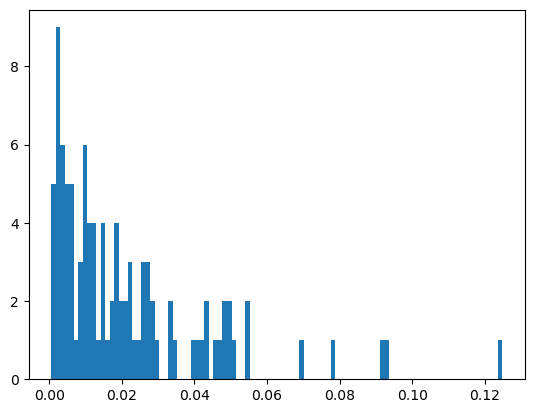

In [9]:
# plot the histogram of weight_dnn
fig, ax = plt.subplots()
plt.hist(weight_dnn, bins=100)
fig.show()

In [10]:
print(max(weight_dnn))

0.124773
